<a href="https://colab.research.google.com/github/longminh123/Nhapmonhocsau/blob/main/lab2/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.core.reshape.reshape import stack

In [3]:
df=pd.read_csv('processed_dulieuxettuyendaihoc.csv')

In [5]:
#Phần 1: Thống kê dữ liệu
#1. Hãy sắp xếp dữ liệu điểm DH1 theo thứ tự tăng dần
df_sapxep_DH1=df.sort_values(by='DH1')
print(df_sapxep_DH1[['T1','DH1']])

     T1   DH1
53  4.9  1.00
43  6.6  1.25
72  5.5  1.50
5   9.3  1.50
87  7.3  1.75
..  ...   ...
84  8.4  6.50
11  7.9  6.75
23  5.3  6.75
24  2.4  7.00
97  8.8  7.00

[100 rows x 2 columns]


In [6]:
#2. Hãy sắp xếp dữ liệu điểm DH2 tăng dần theo nhóm giới tính
df_nam=df[df['GT']=='M']
df_sapxep_nam_DH2=df.sort_values(by='DH2')

df_nu=df[df['GT']=='F']
df_sapxep_nu_DH2=df.sort_values(by='DH2')

print(df_sapxep_nam_DH2[['GT','DH2']])

   GT   DH2
95  F  1.50
25  F  2.00
46  F  2.25
24  F  2.25
99  M  2.50
.. ..   ...
47  M  6.50
11  M  6.50
2   M  6.75
6   F  6.75
97  M  8.00

[100 rows x 2 columns]


In [7]:
#3. Hãy tạo pivot-table để thống kê các giá trị count, sum, mean, median, min, max, sdt, Q1, Q2 và Q3 của DH1 theo KT
df_group_DH1A=df.groupby('KT')['DH1'].agg(['count',np.sum,np.mean,np.median,np.min,np.max,np.std,lambda x: x.quantile(0.25), lambda x: x.quantile(0.5), lambda x: x.quantile(0.75) ])
df_KT=df_group_DH1A.rename(columns={'<lambda_0>':'Q1','<lambda_1>':'Q2','<lambda_2>':'Q3'})
print(pd.pivot_table(df_group_DH1A,columns='KT'))

KT                   A         A1          B          C         D1
<lambda_0>    2.250000   2.187500   3.250000   5.062500   3.000000
<lambda_1>    3.250000   3.000000   3.500000   5.250000   3.750000
<lambda_2>    4.250000   3.250000   3.750000   6.375000   4.875000
amax          6.500000   4.250000   4.500000   7.000000   6.750000
amin          1.000000   2.000000   1.750000   4.750000   1.250000
count        49.000000   6.000000   9.000000  14.000000  22.000000
mean          3.336735   2.916667   3.277778   5.660714   3.829545
median        3.250000   3.000000   3.500000   5.250000   3.750000
std           1.274296   0.861201   0.823905   0.812209   1.370146
sum         163.500000  17.500000  29.500000  79.250000  84.250000


In [9]:
#4. Hãy tạo pivot-table để thống kê các giá trị count, sum, mean, median, min, max, sdt, Q1, Q2 và Q3 của DH1 theo KT và KV
df_group_DH1B=df.groupby(['KT','KV'])['DH1'].agg(['count',np.sum,np.mean,np.median,np.min,np.max,np.std,lambda x: x.quantile(0.25), lambda x: x.quantile(0.5), lambda x: x.quantile(0.75)])
print(pd.pivot_table(df_group_DH1B,columns=('KT','KV')))
df_KT_KV=df_group_DH1B.rename(columns={'<lambda_0>':'Q1','<lambda_1>':'Q2','<lambda_2>':'Q3'})
print(df_KT_KV)

KT                  A                        ...         D1                 
KV                  1          2        2NT  ...          1          2   2NT
<lambda_0>   2.000000   2.250000   2.875000  ...   2.750000   3.562500  3.75
<lambda_1>   3.250000   3.500000   3.500000  ...   3.500000   4.500000  3.75
<lambda_2>   4.250000   4.250000   4.125000  ...   4.250000   5.000000  3.75
amax         6.500000   6.250000   4.750000  ...   5.750000   6.750000  3.75
amin         1.000000   2.000000   2.000000  ...   1.500000   1.250000  3.75
count       29.000000   9.000000  11.000000  ...  13.000000   8.000000  1.00
mean         3.232759   3.527778   3.454545  ...   3.596154   4.218750  3.75
median       3.250000   3.500000   3.500000  ...   3.500000   4.500000  3.75
std          1.369194   1.427653   0.913908  ...   1.264658   1.617082   NaN
sum         93.750000  31.750000  38.000000  ...  46.750000  33.750000  3.75

[10 rows x 13 columns]
        count    sum      mean  median  ...       st

In [10]:
#5. Hãy tạo pivot-table để thống kê các giá trị count, sum, mean, median, min, max, sdt, Q1, Q2 và Q3 của DH1 theo KT, KV và DT
df_group_DH1C=df.groupby(['KT','KV','DT'])['DH1'].agg(['count',np.sum,np.mean,np.median,np.min,np.max,np.std,lambda x: x.quantile(0.25), lambda x: x.quantile(0.5), lambda x: x.quantile(0.75)])
print(pd.pivot_table(df_group_DH1C,columns=('KT','KV','DT')))
df_KT_KV_DT=df_group_DH1C.rename(columns={'<lambda_0>':'Q1','<lambda_1>':'Q2','<lambda_2>':'Q3'})
print(df_KT_KV)

KT                  A                              ...   D1                       
KV                  1          2              2NT  ...    1          2         2NT
DT                0.0        0.0   6.0        0.0  ...  1.0        0.0   1.0   0.0
<lambda_0>   2.000000   2.250000  4.25   2.875000  ...  3.0   4.125000  1.25  3.75
<lambda_1>   3.250000   3.000000  4.25   3.500000  ...  3.0   4.500000  1.25  3.75
<lambda_2>   4.250000   4.187500  4.25   4.125000  ...  3.0   5.000000  1.25  3.75
amax         6.500000   6.250000  4.25   4.750000  ...  3.0   6.750000  1.25  3.75
amin         1.000000   2.000000  4.25   2.000000  ...  3.0   3.000000  1.25  3.75
count       29.000000   8.000000  1.00  11.000000  ...  1.0   7.000000  1.00  1.00
mean         3.232759   3.437500  4.25   3.454545  ...  3.0   4.642857  1.25  3.75
median       3.250000   3.000000  4.25   3.500000  ...  3.0   4.500000  1.25  3.75
std          1.369194   1.498511   NaN   0.913908  ...  NaN   1.171334   NaN   NaN
sum 

GT      F   M
count  48  52


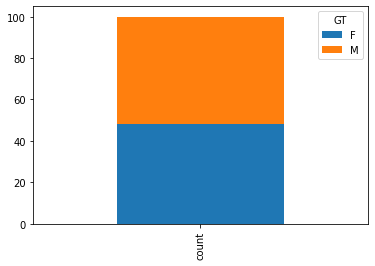

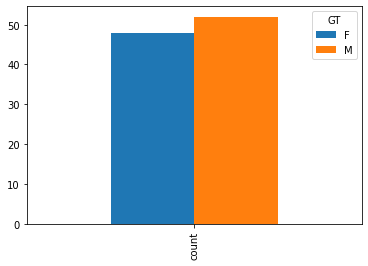

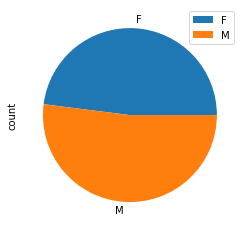

None


In [11]:
#Phần 2: Trình bày dữ liệu
#1. Hãy trình bày dữ liệu biến: GT
df_theo_GT=df.groupby('GT')['GT'].agg(['count'])
df_nam_nu_bang=pd.pivot_table(df_theo_GT,columns='GT')
print(pd.pivot_table(df_theo_GT,columns='GT'))
df_nam_nu_bang.plot.bar(stacked=True)
df_nam_nu_bang.plot.bar()
df_theo_GT.plot.pie(y='count')
print(plt.show())

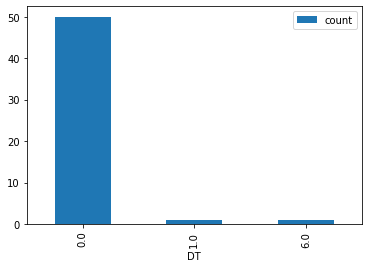

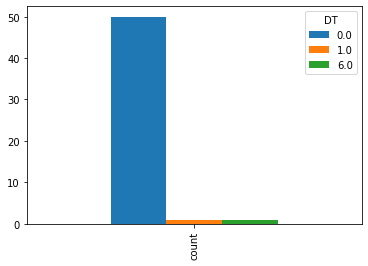

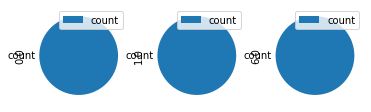

None


In [12]:
#3. Hãy trình bày dữ liệu biến DT với các học sinh là nam
df_nam=df[df['GT']=='M']
df_nam_theo_DT=df_nam.groupby('DT')['DT'].agg(['count'])
df_nam_theo_DT.plot.bar()
df_nam_DT_bang=pd.pivot_table(df_nam_theo_DT,values='count',columns='DT')
df_nam_DT_bang.plot.bar()

df_nam_DT_bang.plot.pie(subplots=True)
print(plt.show())
df_nu=df[df['GT']=='F']
df_nu_theo_DT=df_nu.groupby('DT')['DT'].agg(['count'])

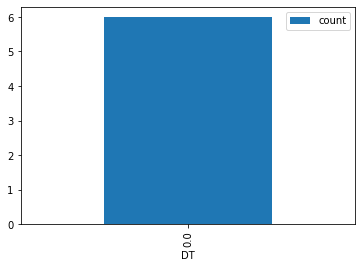

None


In [13]:
#4. Hãy trình bày dữ liệu biến KV với các học sinh là nam thuộc dân tộc Kinh, có điểm thỏa mãn điều kiện (DH1 >= 5.0 và DH2 >= 4.0 và DH3 >= 4.0)
df_nam_DTK_diem=df[(df['DH1']>=5.0)&(df['DH2']>=4.0)&(df['DH3']>=4.0)&(df['GT']=='M')&(df['DT']==0)]
df_nam_theo_KV=df_nam_DTK_diem.groupby('DT')['DT'].agg(['count'])
df_nam_theo_KV.plot.bar()
print(plt.show())

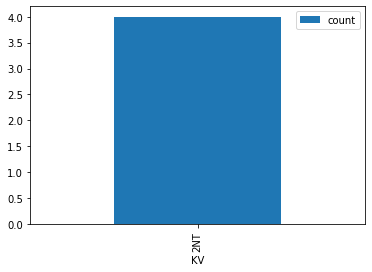

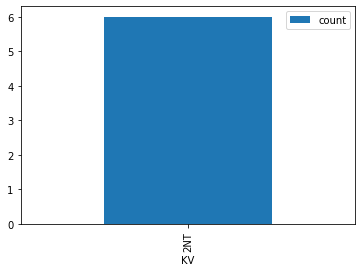

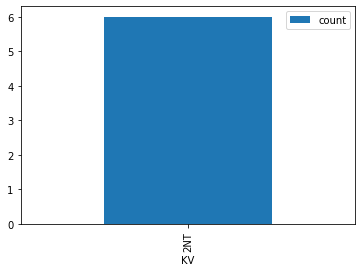

None


In [14]:
#5. Hãy trình bày dữ liệu lần lượt các biến DH1, DH2, DH3 lớn hơn bằng 5.0 và thuộc khu vực 2NT
df_DH1=df[(df['DH1']>=5.0)&(df['KV']=='2NT')].groupby('KV')['KV'].agg(['count'])
df_DH1.plot.bar()

df_DH2=df[(df['DH2']>=5.0)&(df['KV']=='2NT')].groupby('KV')['KV'].agg(['count'])
df_DH2.plot.bar()

df_DH3=df[(df['DH3']>=5.0)&(df['KV']=='2NT')].groupby('KV')['KV'].agg(['count'])
df_DH3.plot.bar()

print(plt.show())

In [15]:
#Phần 3
#1. Trực quan dữ liệu học sinh nữ trên các nhóm XL1, XL2, XL3 dạng unstacked
df_nu_theo_XL1=df_nu.groupby(['XL1'])['XL1'].agg(['count'])
df_nu_theo_XL2=df_nu.groupby(['XL2'])['XL2'].agg(['count'])
df_nu_theo_XL3=df_nu.groupby(['XL3'])['XL3'].agg(['count'])

print(df_nu_theo_XL3)

     count
XL3       
G        1
K       35
TB      12


In [16]:
Y_XL1=int(df_nu_theo_XL1.loc['Y',:])
TB_XL1=int(df_nu_theo_XL1.loc['TB',:])
K_XL1=int(df_nu_theo_XL1.loc['K',:])
G_XL1=int(df_nu_theo_XL1.loc['G',:])
#XS_XL1=int(df_nu_theo_XL1.loc['XS',:])
XS_XL1=0

In [17]:
#XL1_nu=[Y_XL1,TB_XL1,K_XL1,G_XL1,XS_XL1]
Y_XL2=int(df_nu_theo_XL2.loc['Y',:])
TB_XL2=int(df_nu_theo_XL2.loc['TB',:])
K_XL2=int(df_nu_theo_XL2.loc['K',:])
G_XL2=int(df_nu_theo_XL2.loc['G',:])
XS_XL2=0

In [18]:
Y_XL3=0
TB_XL3=int(df_nu_theo_XL3.loc['TB',:])
K_XL3=int(df_nu_theo_XL3.loc['K',:])
G_XL3=int(df_nu_theo_XL3.loc['G',:])
XS_XL3=0

In [19]:
Y=[Y_XL1,Y_XL2,Y_XL3]
TB=[TB_XL1,TB_XL2,TB_XL3]
K=[K_XL1,K_XL2,K_XL3]
G=[G_XL1,G_XL2,G_XL3]
XS=[XS_XL1,XS_XL2,XS_XL3]

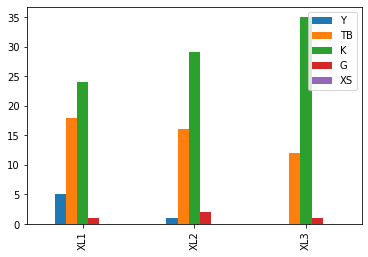

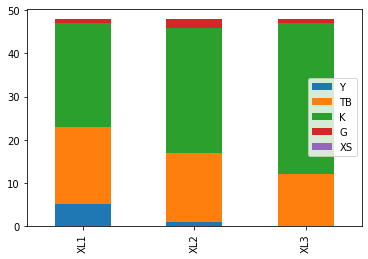

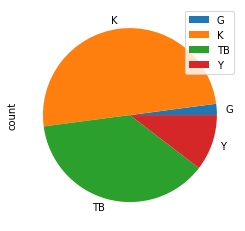

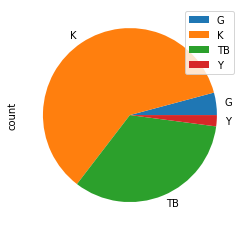

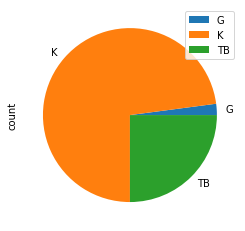

None


In [20]:
index=['XL1','XL2','XL3']
df_xl_nu=pd.DataFrame({'Y':Y,'TB':TB,'K':K,'G':G,'XS':XS},index=index)
df_xl_nu.plot.bar()
df_xl_nu.plot.bar(stacked=True)
df_nu_theo_XL1.plot.pie(y='count')
df_nu_theo_XL2.plot.pie(y='count')
df_nu_theo_XL3.plot.pie(y='count')
print(plt.show())

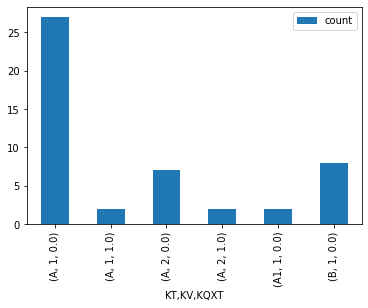

In [21]:
#2. Trực quan dữ liệu KQXT trên nhóm học sinh có khối thi A, A1, B thuộc khu vực 1, 2
#df_kqxt=df[(df['KT']==(['A','B','A1']))&(df['KV']==(['1','2']))].groupby(['KV','KT','KQXT'])['KQXT'].agg(['count'])
df_kqxt=df.loc[df.KV.isin(['1','2'])&df.KT.isin(['A','B','A1'])].groupby(['KT','KV','KQXT'])['KQXT'].agg(['count']).plot.bar()

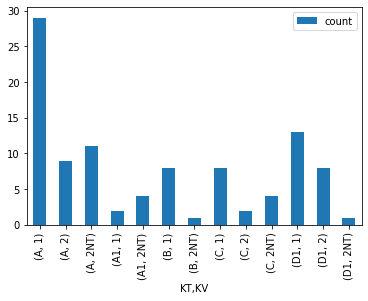

In [22]:
#3. Trực quan dữ liệu số lượng thí sinh từng khu vực dựa trên từng nhóm khối thi
df_slts=df.groupby(['KT','KV'])['KT'].agg(['count']).plot.bar()

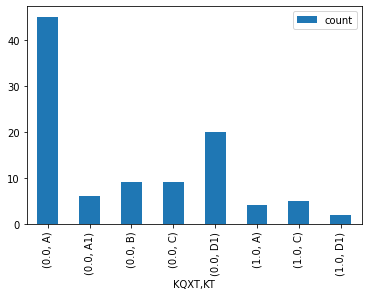

In [23]:
#4. Trực quan dữ liệu số lượng thí sinh đậu, rớt trên từng nhóm khối thi
df_slts4=df.groupby(['KQXT','KT'])['KT'].agg(['count']).plot.bar(stacked=True)

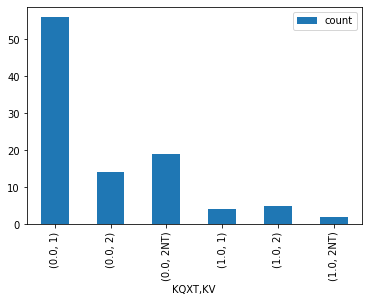

In [24]:
#5. Trực quan dữ liệu số lượng thí sinh đậu rớt trên từng nhóm khu vực.
df_slts5=df.groupby(['KQXT','KV'])['KV'].agg(['count']).plot.bar(stacked=True)

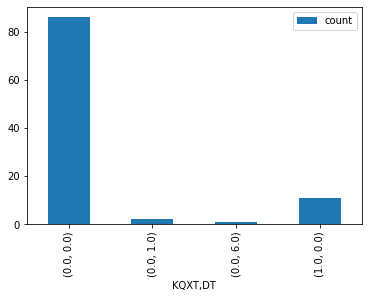

In [25]:
#6. Trực quan dữ liệu số lượng thí sinh đậu rớt dựa trên từng nhóm dân tộc
df_slts6=df.groupby(['KQXT','DT'])['DT'].agg(['count']).plot.bar(stacked=True)

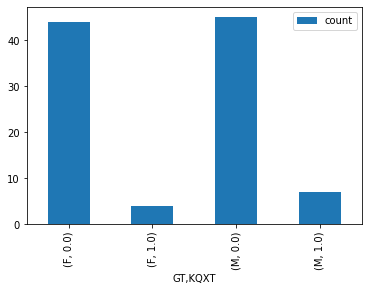

In [26]:
#7. Trực quan dữ liệu số lượng thí sinh đậu rớt dựa trên từng nhóm giới tính.
df_slts7=df.groupby(['GT','KQXT'])['GT'].agg(['count']).plot.bar(stacked=True)

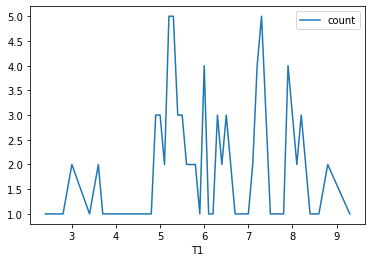

In [27]:
#Phần 4
#1. Vẽ biểu đồ đường Simple cho biến T1
df_T1=df.groupby('T1')['T1'].agg(['count']).plot()

In [28]:
#2.Hãy tạo biến phân loại (phanlopt1) cho môn toán (T1) như sau:
df.loc[(df['T1']<5),'phanlopt1']='Kém'
df.loc[(df['T1']>=5)&(df['T1']<7),'phanlopt1']='Trungbinh'
df.loc[(df['T1']>=7)&(df['T1']<8),'phanlopt1']='Khá'
df.loc[(df['T1']>8),'phanlopt1']='Gioi'

In [29]:
#3 Lập bảng tần số cho biến phanloait1
dfphanlopt1=df.groupby(['T1','phanlopt1'])[['T1','phanlopt1']].agg(['count'])

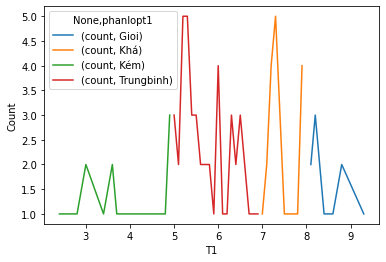

In [30]:
#4. Vẽ biểu đồ đường Multiple Line cho biến T1 được phân loại bởi biến phanlopt1
unstackphanlopt1=dfphanlopt1.unstack()
unstackphanlopt1['phanlopt1'].plot(ylabel='Count')

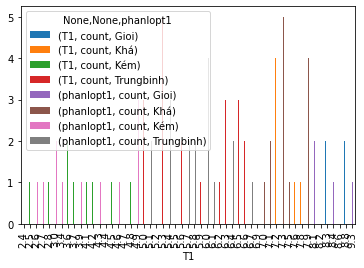

None


In [31]:
#5. Vẽ biểu đồ Drop-line cho biến T1 được phân loại bởi biến phanlopt1
unstackphanlopt1.plot.bar()
print(plt.show())